<a href="https://colab.research.google.com/github/Pranav-V-27/monte_carlo_analysis/blob/main/monte_carlo_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
yf.pdr_override()

In [ ]:
# Download historical data for tickers
#tickers = ['^NSEI', 'INFY.NS', 'RELIANCE.NS', 'BANKINDIA.NS']
tickers = ['LT.NS', 'ITC.NS', 'POWERGRID.NS', 'TATAMOTORS.NS']
data = yf.download(tickers, start='2023-01-01', end='2023-05-03')['Adj Close']
#data = web.DataReader(tickers, 'yahoo', start_date, end_date)['Adj Close']
returns = data.pct_change().dropna()


In [ ]:
# Calculate portfolio mean return and covariance
weights = np.array([0.25, 0.25, 0.25, 0.25])
mean_return = np.sum(returns.mean() * weights)
covariance = returns.cov()


In [ ]:
# Perform Monte Carlo simulations
num_sims = 10000
sim_returns = np.zeros(num_sims)
sim_volatility = np.zeros(num_sims)

for i in range(num_sims):
    # Generate random portfolio weights
    weights = np.random.rand(len(tickers))
    weights /= np.sum(weights)
    
    # Calculate portfolio returns and volatility
    sim_returns[i] = np.sum(returns.mean() * weights)
    sim_volatility[i] = np.sqrt(np.dot(weights.T, np.dot(covariance * 252, weights)))


In [ ]:
# Calculate 95% confidence interval for portfolio returns and volatility
conf_level = 0.95
sort_order = np.argsort(sim_returns)
lower_index = int((1 - conf_level) / 2 * num_sims)
upper_index = int((1 + conf_level) / 2 * num_sims)
lower_return = sim_returns[sort_order[lower_index]]
upper_return = sim_returns[sort_order[upper_index]]
lower_volatility = sim_volatility[sort_order[lower_index]]
upper_volatility = sim_volatility[sort_order[upper_index]]



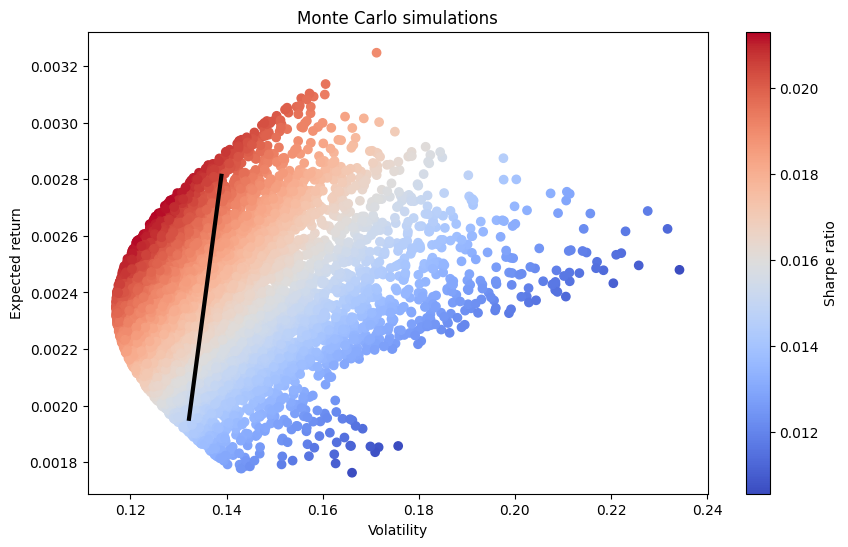

In [ ]:
# Plot Monte Carlo simulations
plt.figure(figsize=(10, 6))
plt.scatter(sim_volatility, sim_returns, c=sim_returns/sim_volatility, marker='o', cmap='coolwarm')

#plt.scatter(sim_volatility[sharpe_ratios.argmax()],  sim_returns[sharpe_ratios.argmax()], c='r')

plt.colorbar(label='Sharpe ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected return')
plt.title('Monte Carlo simulations')
plt.plot([lower_volatility, upper_volatility], [lower_return, upper_return], 'k-', lw=3)
plt.show()